# Explorando las vialidades de Hermosillo

## 0 Configuración del entorno

In [18]:
import sys
from pathlib import Path

import osmnx as ox
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# configuraciones de visualizacion y logs
ox.settings.log_console = True
ox.settings.use_cache = True

In [19]:
ROOT_DIR = Path().resolve().parent.parent

if str(ROOT_DIR) not in sys.path: 
    sys.path.insert(0, str(ROOT_DIR))

In [20]:
from src.config import DATA_DIR, RAW_DIR

GEO_DIR = RAW_DIR / "geo"
GEO_DIR.mkdir(exist_ok=True)

## 1 OSMnx

[`osmnx`](https://wiki.openstreetmap.org/wiki/OSMnx) es una biblioteca de Python que permite: 

* Descargar datos de **OpenStreetMap** (**OSM**), 
* Construir **grafos geográficos** de redes (calles, ríos, senderos, etc.),
* Analizar y visualizar redes urbanas, 
* Exportar esos datos a **GeoDataFrames** o **Shapefiles**


In [21]:
%pdoc ox

Class docstring:
    OSMnx is a Python package to easily download, model, analyze, and visualize
    street networks and other geospatial features from OpenStreetMap.
    
    Full documentation at: https://osmnx.readthedocs.io
    
    If you use OSMnx in your work, please cite: https://doi.org/10.1111/gean.70009

### 1.1 Street Networks

Primero es necesario descargar la red de calles para alguna ciudad: 

In [22]:
%pdoc ox.graph

Class docstring:
    Download and create graphs from OpenStreetMap data.
    
    Refer to the Getting Started guide for usage limitations.

In [23]:
%pdoc ox.graph.graph_from_place

Class docstring:
    Download and create a graph within the boundaries of some place(s).
    
    The query must be geocodable and OSM must have polygon boundaries for the
    geocode result. If OSM does not have a polygon for this place, you can
    instead get its street network using the `graph_from_address` function,
    which geocodes the place name to a point and gets the network within some
    distance of that point.
    
    If OSM does have polygon boundaries for this place but you're not finding
    it, try to vary the query string, pass in a structured query dict, or vary
    the `which_result` argument to use a different geocode result. If you know
    the OSM ID of the place, you can retrieve its boundary polygon using the
    `geocode_to_gdf` function, then pass it to the `features_from_polygon`
    function.
    
    This function uses filters to query the Overpass API: you can either
    specify a pre-defined `network_type` or provide your own `custom_filter`
    with 

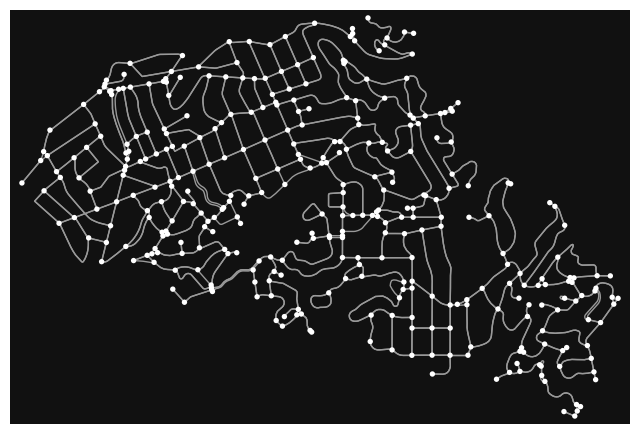

In [24]:
G = ox.graph.graph_from_place("Piedmont, California, USA", network_type="drive")
fig, ax = ox.plot.plot_graph(G)

Convertir datos a GeoDataFrames: 

In [25]:
%pdoc ox.graph_to_gdfs

Class docstring:
    Convert a MultiGraph or MultiDiGraph to node and/or edge GeoDataFrames.
    
    This function is the inverse of `graph_from_gdfs`.
    
    Parameters
    ----------
    G
        Input graph.
    nodes
        If True, convert graph nodes to a GeoDataFrame and return it.
    edges
        If True, convert graph edges to a GeoDataFrame and return it.
    node_geometry
        If True, create a geometry column from node "x" and "y" attributes.
    fill_edge_geometry
        If True, fill missing edge geometry fields using endpoint nodes'
        coordinates to create a LineString.
    
    Returns
    -------
    gdf_nodes or gdf_edges or (gdf_nodes, gdf_edges)
        `gdf_nodes` is indexed by `osmid` and `gdf_edges` is multi-indexed by
        `(u, v, key)` following normal MultiGraph/MultiDiGraph structure.
Call docstring:
    Call self as a function.

In [26]:
nodes, edges = ox.graph_to_gdfs(G)

In [27]:
nodes.head()

,y,x,street_count,highway,junction,geometry
osmid,,,,,,
53017091,37.826250,-122.247604,3,NaN,NaN,POINT (-122.2476 37.82625)
53018397,37.824220,-122.247198,3,stop,NaN,POINT (-122.2472 37.82422)
53018399,37.824900,-122.246113,3,NaN,NaN,POINT (-122.24611 37.8249)
53018402,37.825406,-122.245338,3,NaN,NaN,POINT (-122.24534 37.82541)
53018404,37.825948,-122.244467,3,NaN,NaN,POINT (-122.24447 37.82595)


In [28]:
edges.head()

osmid      highway          name  oneway reversed  \
u        v        key                                                          
53017091 53064327 0      6345781  residential   Rose Avenue   False    False   
         53075599 0      6345781  residential   Rose Avenue   False     True   
53018397 53018399 0      6327298  residential   Lake Avenue   False    False   
         53018411 0    196739937     tertiary  Linda Avenue   False    False   
         53097980 0    196739937     tertiary  Linda Avenue   False     True   

                           length  \
u        v        key               
53017091 53064327 0    230.124412   
         53075599 0    122.234915   
53018397 53018399 0    121.647438   
         53018411 0     37.593760   
         53097980 0    100.205124   

                                                                geometry  \
u        v        key                                                      
53017091 53064327 0    LINESTRING (-122.2476 37.82625, -122.2475 37.8...   
         53075599 0    LINESTRING (-122.2476 37.82625, -122.24771 37....   
53018397 53018399 0    LINESTRING (-122.2472 37.82422, -122.24712 37....   
         53018411 0    LINESTRING (-122.2472 37.82422, -122.24713 37....   
         53097980 0    LINESTRING (-122.2472 37.82422, -122.24772 37....   

                      lanes maxspeed bridge junction  
u        v        key                                 
53017091 53064327 0     NaN      NaN    NaN      NaN  
         53075599 0     NaN      NaN    NaN      NaN  
53018397 53018399 0     NaN      NaN    NaN      NaN  
         53018411 0     NaN      NaN    NaN      NaN  
         53097980 0     NaN      NaN    NaN      NaN

<Axes: >

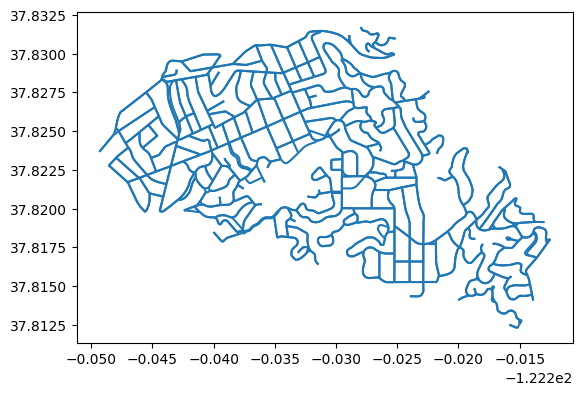

In [29]:
edges.plot()

## Red vial de Hermosillo

In [30]:
place_hmo = "Hermosillo, Sonora, México"

G_hmo = ox.graph_from_place(place_hmo, network_type='drive')

In [31]:
nodes_hmo, edges_hmo = ox.graph_to_gdfs(G_hmo)

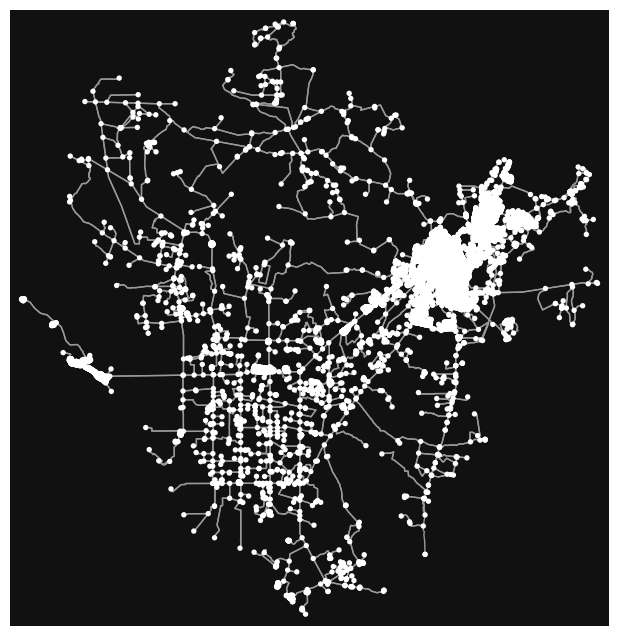

In [32]:
fig, ax = ox.plot.plot_graph(G_hmo)

<Axes: >

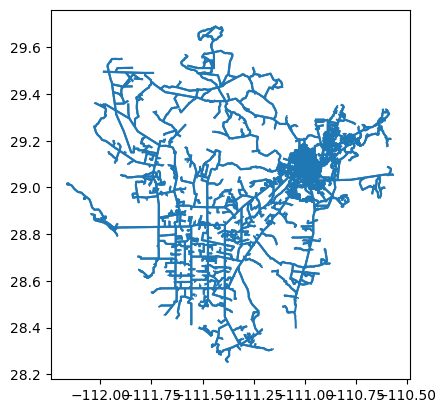

In [33]:
edges_hmo.plot()

In [34]:
edges_hmo.head()

osmid       highway         name  \
u         v          key                                         
316362546 3173455691 0    566790774      tertiary     Calle 26   
          8672499462 0    566802152     secondary  Calle 4 Sur   
          6542895733 0    566790774      tertiary     Calle 26   
          6539614527 0    566802152     secondary  Calle 4 Sur   
336150447 8520299664 0    917342842  unclassified          NaN   

                                     ref  oneway reversed       length  \
u         v          key                                                 
316362546 3173455691 0    SON 110;SON 26   False     True    78.609461   
          8672499462 0            SON 61   False     True    28.811070   
          6542895733 0    SON 110;SON 26   False    False  1137.846695   
          6539614527 0            SON 61   False    False  4060.962355   
336150447 8520299664 0               NaN   False    False    47.918386   

                                                                   geometry  \
u         v          key                                                      
316362546 3173455691 0    LINESTRING (-111.39132 28.56881, -111.39051 28...   
          8672499462 0    LINESTRING (-111.39132 28.56881, -111.39132 28...   
          6542895733 0    LINESTRING (-111.39132 28.56881, -111.39399 28...   
          6539614527 0    LINESTRING (-111.39132 28.56881, -111.39131 28...   
336150447 8520299664 0    LINESTRING (-111.49433 28.54582, -111.49402 28...   

                         maxspeed lanes bridge width tunnel junction access  
u         v          key                                                     
316362546 3173455691 0        NaN   NaN    NaN   NaN    NaN      NaN    NaN  
          8672499462 0        NaN   NaN    NaN   NaN    NaN      NaN    NaN  
          6542895733 0        NaN   NaN    NaN   NaN    NaN      NaN    NaN  
          6539614527 0        NaN   NaN    NaN   NaN    NaN      NaN    NaN  
336150447 8520299664 0        NaN   NaN    NaN   NaN    NaN      NaN    NaN

In [35]:
edges_hmo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 91706 entries, (np.int64(316362546), np.int64(3173455691), np.int64(0)) to (np.int64(8742866580), np.int64(8742952939), np.int64(0))
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   osmid     91706 non-null  object  
 1   highway   91706 non-null  object  
 2   name      57890 non-null  object  
 3   ref       2098 non-null   object  
 4   oneway    91706 non-null  bool    
 5   reversed  91706 non-null  object  
 6   length    91706 non-null  float64 
 7   geometry  91706 non-null  geometry
 8   maxspeed  3656 non-null   object  
 9   lanes     3505 non-null   object  
 10  bridge    204 non-null    object  
 11  width     140 non-null    object  
 12  tunnel    11 non-null     object  
 13  junction  204 non-null    object  
 14  access    102 non-null    object  
dtypes: bool(1), float64(1), geometry(1), object(12)
memory usage: 13.2+ MB


In [40]:
edges_hmo['name']

u           v           key
316362546   3173455691  0         Calle 26
            8672499462  0      Calle 4 Sur
            6542895733  0         Calle 26
            6539614527  0      Calle 4 Sur
336150447   8520299664  0              NaN
                                  ...     
7771024545  8740673566  0              NaN
7771024552  7771024539  0              NaN
            7771024546  0              NaN
            7771024530  0              NaN
8742866580  8742952939  0              NaN
Name: name, Length: 91706, dtype: object